In [25]:
import re
import unicodedata
import pandas as pd
import nltk

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import 

from env import user, password, host

def get_db_url(database, host=host, user=user, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'


url = get_db_url("spam_db")
sql = "SELECT * FROM spam"

df = pd.read_sql(sql, url, index_col="id")
df.head()

,label,text
id,,
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exercises

Do your work for this exercise in a file named explore.

1. Spam Data:
    - Load the spam data set.
    - Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    - Is there any overlap in the bigrams for the spam data and the ham data?
    - Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [8]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [9]:
def show_counts_and_ratios(df, column):
    """
    Takes in a dataframe and a string of a single column
    Returns a dataframe with absolute value counts and percentage value counts
    """
    labels = pd.concat([df[column].value_counts(),
                    df[column].value_counts(normalize=True)], axis=1)
    labels.columns = ['n', 'percent']
    labels
    return labels

show_counts_and_ratios(df, "label")

,n,percent
ham,4825,0.865937
spam,747,0.134063


Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?


In [26]:
ham_words = clean(' '.join(df[df.label == 'ham'].text))
spam_words = clean(' '.join(df[df.label == 'spam'].text))
all_words = clean(' '.join(df.text))

In [31]:
ham_bigrams = (pd.Series(nltk.bigrams(ham_words))
                .value_counts()
                .head(25))

ham_bigrams

(call, later)      52
(ill, call)        48
(let, know)        42
(sorry, ill)       39
(dont, know)       32
(good, morning)    31
(new, year)        30
(take, care)       26
(im, going)        24
(ok, lor)          22
(pls, send)        22
(im, gonna)        20
(good, night)      19
(happy, new)       19
(wat, time)        18
(last, night)      18
(hi, hi)           18
(great, day)       17
(dont, want)       15
(want, go)         15
(nice, day)        15
(send, message)    15
(dont, think)      14
(hope, good)       14
(4, dinner)        14
dtype: int64

In [30]:
spam_bigrams = (pd.Series(nltk.bigrams(spam_words))
                        .value_counts()
                        .head(25))
spam_bigrams

(please, call)          44
(customer, service)     27
(po, box)               24
(a1000, cash)           23
(guaranteed, call)      23
(prize, guaranteed)     22
(send, stop)            19
(selected, receive)     19
(await, collection)     19
(every, week)           19
(chance, win)           19
(urgent, mobile)        18
(land, line)            18
(valid, 12hrs)          17
(claim, call)           17
(sae, tc)               16
(account, statement)    16
(call, 08000930705)     16
(prize, claim)          16
(ur, mob)               15
(call, mobileupd8)      15
(call, customer)        15
(dating, service)       15
(free, entry)           15
(trying, contact)       15
dtype: int64

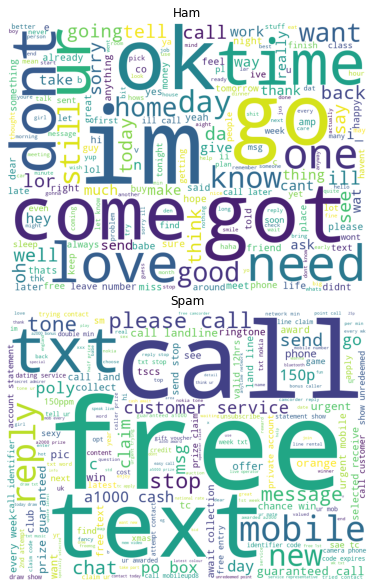

In [46]:
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(ham_cloud)
axs[1].imshow(spam_cloud)

axs[0].set_title('Ham')
axs[1].set_title('Spam')

for ax in axs: ax.axis('off')

Is there any overlap in the bigrams for the spam data and the ham data?

In [44]:
ham_big = pd.DataFrame(ham_bigrams)
spam_big = pd.DataFrame(spam_bigrams)
pd.concat([ham_big, spam_big], axis=1)

,,0,0
call,later,52.0,NaN
ill,call,48.0,NaN
let,know,42.0,NaN
sorry,ill,39.0,NaN
dont,know,32.0,NaN
good,morning,31.0,NaN
new,year,30.0,NaN
take,care,26.0,NaN
im,going,24.0,NaN
ok,lor,22.0,NaN


Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [51]:
spam_trigrams = (pd.Series(nltk.ngrams(spam_words, 3))
                        .value_counts()
                        .head(10))
spam_trigrams

(prize, guaranteed, call)     21
(call, customer, service)     15
(land, line, claim)           14
(reply, call, 08000930705)    14
(private, 2003, account)      13
(2003, account, statement)    13
(camcorder, reply, call)      12
(guaranteed, a1000, cash)     12
(show, 800, unredeemed)       12
(urgent, trying, contact)     11
dtype: int64

In [50]:
ham_bigrams = (pd.Series(nltk.ngrams(ham_words, 3))
                .value_counts()
                .head(10))

ham_bigrams

(ill, call, later)      42
(sorry, ill, call)      38
(happy, new, year)      19
(pls, send, message)    13
(cant, pick, phone)     12
(right, pls, send)      12
(phone, right, pls)     12
(pick, phone, right)    12
(hi, hi, hi)            11
(x, x, x)                8
dtype: int64

2. Explore the blog articles using the techniques discussed in the exploration lesson.

3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring.
